<a href="https://colab.research.google.com/github/Kowndinya2000/99-programs-POP/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

**Import Packages to start**

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()


**A sample data to demonstrate the technique**

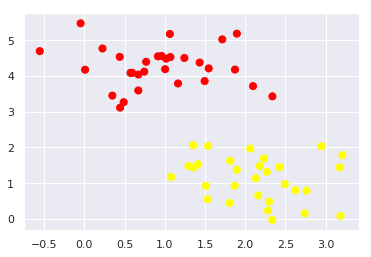

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

A linear discriminative classifier can draw a straight line separating the two sets of data, and thereby create a classification model. 
For the above two dimensional data, even we can draw it by hand. 

However, there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

(-1, 3.5)

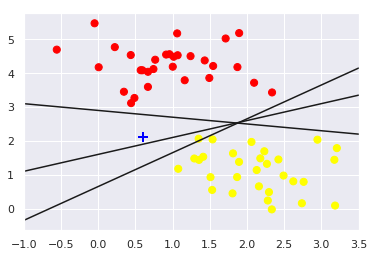

In [5]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'+',color='blue',markeredgewidth=2,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
  plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5)

Here we can see three very different separators which, nevertheless, perfectly discriminate between these samples. 

Depending on which line you choose, a new data point (e.g., the one marked by the "+" in this plot) will be assigned a different label

Instead of simply drawing a zero-width line between the classes, we can draw each line a margin of some width, up to the nearest point. For example:

(-1, 3.5)

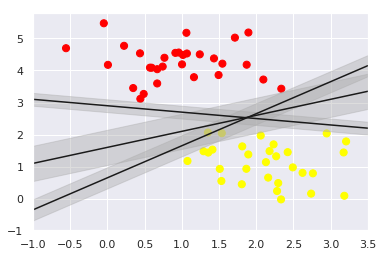

In [7]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
  yfit = m*xfit+b
  plt.plot(xfit,m*xfit+b,'-k')
  plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)

plt.xlim(-1,3.5)

# *Prepare the SVM Model*



In [9]:
from sklearn.svm import SVC 
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  Y, X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X,Y,P,colors='k', levels=[-1,0,1],aplha=0.5,linestyles=['--','-','--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


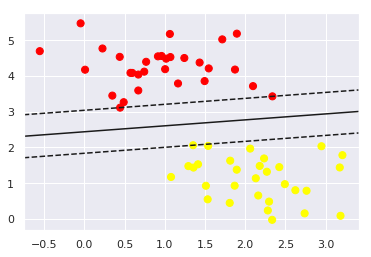

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model);

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

For the fit, only the position of the support vectors matter. Any point away from the correct side of the margin do not modify the fit.

This is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


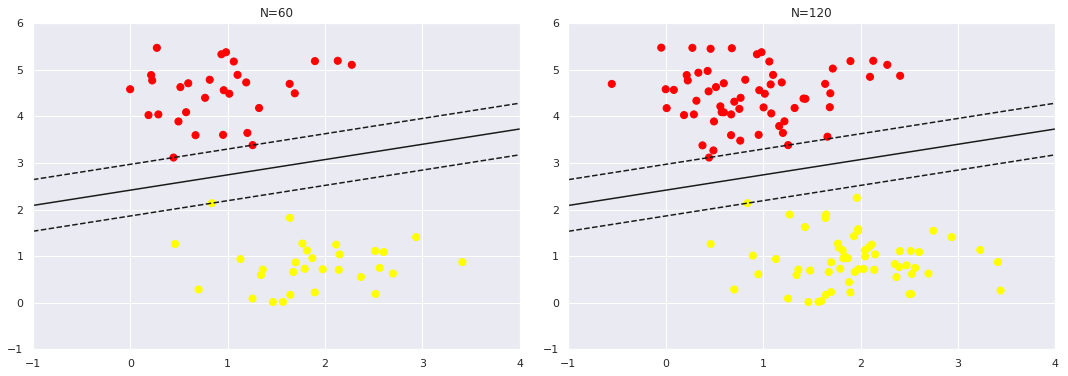

In [15]:
def plot_svm(N=10, ax=None):
  X,y = make_blobs(n_samples=200, centers=2, random_state=0,cluster_std=0.6)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C = 1E10)
  model.fit(X,y)

  ax = ax or plt.gca()
  ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
  ax.set_xlim(-1,4)
  ax.set_ylim(-1,6)
  plot_svc_decision_function(model,ax)

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax,[60,120]):
  plot_svm(N,axi)
  axi.set_title('N={0}'.format(N))


In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed.

Three support vectors from the left panel are the same support vectors from the right panel. 

This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.


Use  interactive widget to view this feature of the SVM model interactively:

In [17]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,20,30,50,100,200,1000], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 50, 100, 200, 1000), value=10), Output())…

## ***Tuning the SVM edges***

Above example was very clean dataset, where a perfect decision boundary exists. 

If there is noise in the data or the data is not separable like the data below, we need to soften the margin

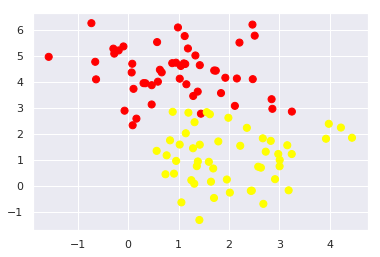

In [19]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn');

We can crontrol the hardness of the margin by a tuning parameter **(C)**. 

For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing C parameter affects the final fit, via the softening of the margin:

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


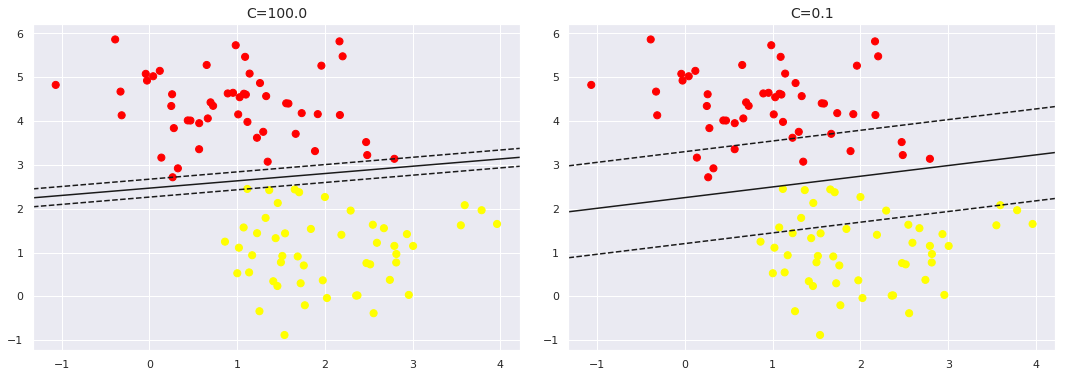

In [21]:
X,y = make_blobs(n_samples=100, centers=2,random_state=0,cluster_std=0.8)

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0,0.1]):
  model = SVC(kernel='linear',C=C).fit(X,y)
  axi.scatter(X[:,0], X[:,1],c=y,s=50, cmap='autumn')
  plot_svc_decision_function(model,axi)
  axi.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],s=300,lw=1,facecolors='none');
  axi.set_title('C={0:.1f}'.format(C),size=14)

## ***SVM KERNEL***

SVM becomes extremely powerful when it is combined with kernels. 

When the data is non separable, we can transorm them into higher dimensionsal spaces to make them linerly separable.

Let's look at some data that is not linearly separable.

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


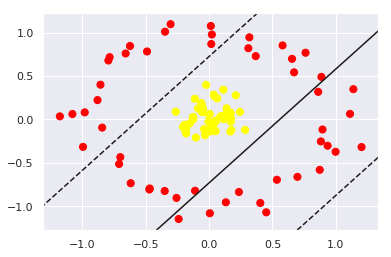

In [23]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,factor=.1,noise=.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False);

No linear discrimination will ever be able to separate this data. 

However, we can can project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function **(RBF)** centered on the middle clump:

In [0]:
r = np.exp(-(X**2).sum(1))

We can visualize this extra data dimension using a three-dimensional plot. Please use the sliders to rotate the plot:

In [26]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')

interact(plot_3D, elev=[0,-90,-45,-15,15,40,90],azip=(-180,180),X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(0, -90, -45, -15, 15, 40, 90), value=0), IntSlider…

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, r=0.7.

In [27]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


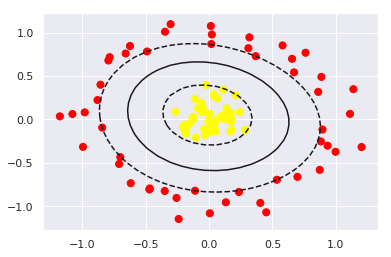

In [29]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='none');

## Explaining the W vector in terms of origin and angles

## Two point scenario

In [0]:
from matplotlib import pyplot as plt 
import numpy as np

In [0]:
A = np.array([2,3]).reshape(2,1)
B = np.array([3,4]).reshape(2,1)


In [32]:
X = np.concatenate((A,B),axis=1)
print(X,X.shape)

[[2 3]
 [3 4]] (2, 2)


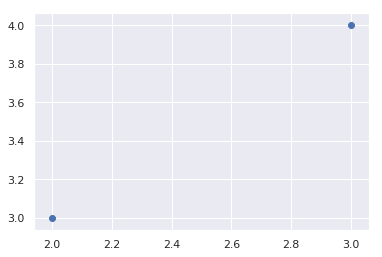

In [33]:
plt.scatter(X[:,0],X[:,1])

In [34]:
w = np.random.rand(1,2)
print(np.dot(w,X[:,0]))

[0.30709416]


In [0]:
def f_error(w):
  return (1-np.dot(w,X[:,0]))**2 + (-1-np.dot(w,X[:,1]))**2

In [0]:
from scipy.optimize import minimize

In [38]:
res = minimize(fun=f_error,x0=w)
w_min = res.x.ravel().reshape(2,1)
print(w_min,w_min.shape)

[[-6.99999907]
 [ 4.99999932]] (2, 1)


In [39]:
print (np.matmul(X.T,w_min))

[[ 0.99999983]
 [-0.99999992]]


Text(2, 2, '-1')

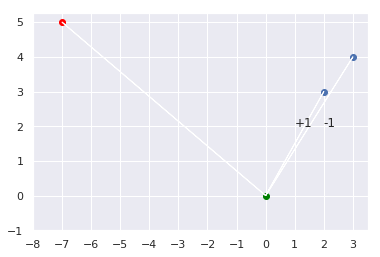

In [41]:
tmp = w_min.ravel()
plt.scatter(X[:,0],X[:,1])
plt.scatter(tmp[0],tmp[1],color='red')
plt.scatter(0,0,color='green')

plt.arrow(0,0,tmp[0],tmp[1])
plt.arrow(0,0,X[0,0],X[1,0])
plt.arrow(0,0,X[0,1],X[1,1])

plt.xticks(np.arange(-8,4))
plt.yticks(np.arange(-1,6))

plt.text(1,2,'+1')
plt.text(2,2,'-1')

### Multiple point scenario

In [0]:
x = np.linspace(4,10,4).reshape(-1,1)

In [0]:
y_pos = 3*x + 10

In [0]:
y_neg = 3*x + 6

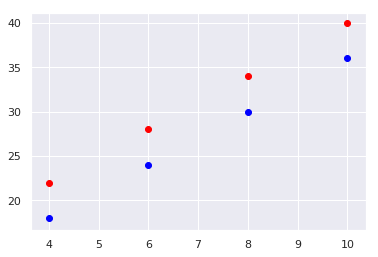

In [45]:
plt.scatter(x,y_pos,color='red')
plt.scatter(x,y_neg,color='blue')

In [0]:
#np.ones(x.shape[0]).reshape(-1,1)
X_pos = np.concatenate( (x,y_pos), axis=1)

X_neg = np.concatenate( (x,y_neg), axis=1)

In [0]:
X_pos = np.concatenate((x,y_pos),axis=1)
X_neg = np.concatenate((x,y_neg),axis=1)

In [0]:
tmp = np.mean(np.concatenate((X_pos,X_neg),axis=0),axis=0)
X_pos = X_pos - tmp
X_neg = X_neg - tmp

In [48]:
w = np.random.rand(2).reshape(-1,1)
print(w)
print(np.matmul(X_pos,w), np.matmul(X_neg,w))

[[0.61737678]
 [0.2194743 ]]
[[-3.3884504 ]
 [-0.83685107]
 [ 1.71474826]
 [ 4.26634759]] [[-4.26634759]
 [-1.71474826]
 [ 0.83685107]
 [ 3.3884504 ]]


In [0]:
def f_error(w):
  return np.sum((1-np.matmul(X_pos,w))**2 + (-1-np.matmul(X_neg,w))**2)

In [0]:
res = minimize(fun=f_error,x0 = w)
w_min = res.x.reshape(-1,1)
X_all = np.concatenate((X_pos,X_neg),axis=0)

In [51]:
print(np.matmul(X_all,w_min))

[[ 0.99999994]
 [ 0.99999997]
 [ 0.99999999]
 [ 1.00000002]
 [-1.00000002]
 [-0.99999999]
 [-0.99999997]
 [-0.99999994]]


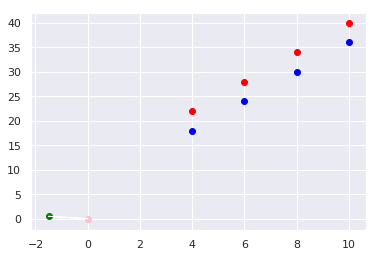

In [52]:
tmp = w_min.ravel()

plt.scatter(x,y_pos,color='red')
plt.scatter(x,y_neg,color='blue')
plt.scatter(0,0,color='pink')
plt.scatter(tmp[0],tmp[1],color='green')
plt.arrow(0,0,tmp[0],tmp[1])